## Perceptron Trick
- using Perceptron trick we classified points

### IMPORT LIBRARIES

In [1]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

### LOAD DATA

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

### PLOTTING DATA

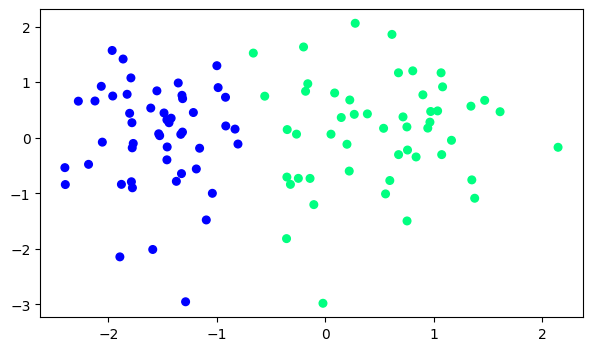

In [3]:
plt.figure(figsize=(7,4))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=30)
plt.show()

### PERCEPTRON TRICK LOGIC

In [4]:
def perceptron(X, y):
    # Inserting a column of ones at the beginning of the feature matrix X
    X = np.insert(X, 0, 1, axis=1)  # for Adding bias term
    # Initializing weights with ones
    weights = np.ones(X.shape[1])  # Initializing weights
    # Learning rate
    lr = 0.1  
    
    # Iterating for a fixed number of iterations (1000 in this case)
    for i in range(1000):
        # Randomly select points from the dataset
        j = np.random.randint(0, 100) 
        
        # Calculate the predicted output (y_hat) for the selected sample using step function
        y_hat = step(np.dot(X[j], weights))  
        
        # Update weights using the perceptron learning rule
        weights = weights + lr * (y[j] - y_hat) * X[j] 
    
    # Returning the bias term and the rest of the weights
    return weights[0], weights[1:]

# Step function (Activation function)
def step(x):
    return 1 if x >= 0 else 0

In [9]:
intercept_,coef_ = perceptron(X,y)
print(coef_)
print(intercept_)

[1.27888433 0.13341995]
1.0


In [10]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [11]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

### PLOTTING DATA

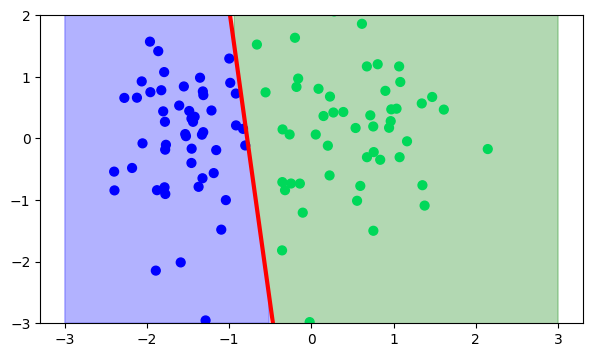

In [17]:
plt.figure(figsize=(7,4))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=40)

# Define the regions
plt.fill_between(x_input, y_input, -3, where=(y_input >= -3), color='blue', alpha=0.3)
plt.fill_between(x_input, y_input, 2, where=(y_input <= 2), color='green', alpha=0.3)

plt.ylim(-3, 2)
plt.show()

### CONCLUSION:-
- Using perceptron we can clerary classified points into two regions.

### Problem with Perceptron Trick
- In the Perceptron trick, points are classified into two regions, but there are some issues:

- Firstly, when running the Perceptron trick multiple times, we obtain different separating lines each time. However, it's challenging to determine which line is the best. This lack of consistency can make it difficult to rely on the results of the Perceptron trick.

- Secondly, there's a problem with convergence. In the trick, we randomly select points in a loop, but this randomness can cause issues. Sometimes we select the same point repeatedly, and sometimes we select correctly classified points. This inconsistency in point selection affects the convergence of the trick.

- To address these issues, we can introduce a loss function.